In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('truck.csv')
df

C:\Users\Rahul\AppData\Local\Temp\ipykernel_31252\2871073877.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('truck.csv')


,Unnamed: 0,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
0,0,2017-10-31 18:45:59.000000,0,ffb0fd700220fff43fffe74808e73e03f33400ef33fbe1...,2.2,14.48,NaN,NaN,44.313725,NaN,NaN,0.0,0.00,903.00,4.0,NaN,15.686275,1
1,1,2017-10-31 18:46:00.000000,0,00b0fda802e804e14104ed3d01ee3a08ec4c04f738fbd5...,3.7,14.48,NaN,NaN,35.294118,NaN,NaN,0.0,0.00,938.00,6.0,NaN,15.294118,1
2,2,2017-10-31 18:46:01.000000,0,00f0fe5002b0fdea4009e33c01ed3701ec4100f53b05e8...,3.9,14.54,NaN,NaN,29.411765,NaN,NaN,0.0,0.00,1044.50,7.0,NaN,14.901961,1
3,3,2017-10-31 18:46:02.000000,0,0120fdc0028804e03c10de3a09e8400ce43b0ae63b01f4...,3.9,14.56,NaN,NaN,53.725490,NaN,NaN,0.0,0.00,1102.00,7.0,NaN,17.647059,1
4,4,2017-10-31 18:46:03.000000,0,00a0fde802d816e0370ae73604e23b04e53900e542ffea...,4.7,14.48,NaN,NaN,75.686275,NaN,NaN,0.0,0.00,1626.50,10.0,NaN,23.529412,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214690,784210,2017-12-31 17:15:24.000000,1081,0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,53
7214691,784211,2017-12-31 17:15:25.000000,1081,0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,53
7214692,784212,2017-12-31 17:15:26.000000,1081,0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,53
7214693,784213,2017-12-31 17:15:27.000000,1081,0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,53


In [3]:
df = df.dropna()

In [4]:
df = df.drop(['accData','Unnamed: 0'],axis=1)
df['timeStamp'] = df['timeStamp'].astype('datetime64[ns]')

In [5]:
df['timeStamp'] = df.timeStamp.values.astype(np.int64) // 10 ** 9
df

,timeStamp,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
117459,1514762901,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2
117460,1514762902,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2
117461,1514762903,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2
117462,1514762904,0,2.4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2
117463,1514762905,0,2.7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214690,1514740524,1081,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,53
7214691,1514740525,1081,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,53
7214692,1514740526,1081,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,53
7214693,1514740527,1081,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,53


In [6]:
df.shape

(2099200, 16)

In [7]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

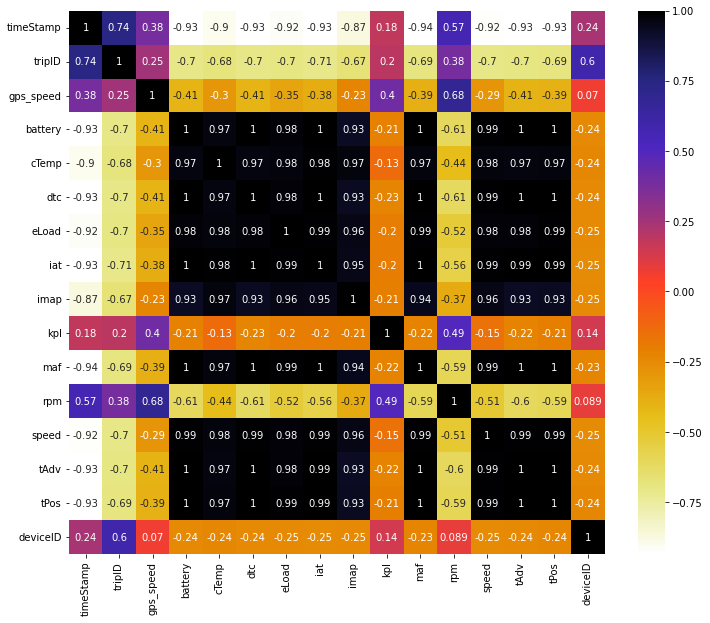

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()



In [9]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
req_fet=list(correlation(df,0.6))

In [11]:
features=df[req_fet]
features=features.reset_index()
features

,index,tripID,eLoad,tAdv,maf,iat,tPos,dtc,imap,speed,battery,rpm,cTemp
0,117459,0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,117460,0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,117461,0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,117462,0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,117463,0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099195,7214690,1081,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2099196,7214691,1081,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2099197,7214692,1081,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2099198,7214693,1081,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099200 entries, 117459 to 7214694
Data columns (total 16 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timeStamp  int64  
 1   tripID     int64  
 2   gps_speed  float64
 3   battery    float64
 4   cTemp      float64
 5   dtc        float64
 6   eLoad      float64
 7   iat        float64
 8   imap       float64
 9   kpl        float64
 10  maf        float64
 11  rpm        float64
 12  speed      float64
 13  tAdv       float64
 14  tPos       float64
 15  deviceID   int64  
dtypes: float64(13), int64(3)
memory usage: 272.3 MB


In [13]:
df.describe()

,timeStamp,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06,2.099200e+06
mean,1.510111e+09,3.854754e+02,7.885785e+00,1.232367e+02,1.539025e+02,1.221911e+02,1.385848e+02,1.358630e+02,1.610007e+02,4.726042e+00,1.264032e+02,6.316646e+02,1.345182e+02,1.229652e+02,1.249700e+02,3.979712e+01
std,3.228994e+06,3.288698e+02,1.415394e+01,1.264352e+02,1.002028e+02,1.273895e+02,1.134956e+02,1.148390e+02,9.659655e+01,7.228569e+00,1.234790e+02,5.897552e+02,1.170525e+02,1.267519e+02,1.249858e+02,1.425617e+01
min,1.504051e+09,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+01,0.000000e+00,0.000000e+00,-4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+01,0.000000e+00,2.000000e+00
25%,1.507499e+09,1.020000e+02,0.000000e+00,0.000000e+00,7.900000e+01,0.000000e+00,2.627451e+01,3.000000e+01,9.700000e+01,3.021000e+00,7.860000e+00,2.550000e+02,1.500000e+01,0.000000e+00,0.000000e+00,4.300000e+01
50%,1.511124e+09,2.260000e+02,4.000000e-04,1.437500e+01,9.200000e+01,0.000000e+00,8.509804e+01,4.900000e+01,1.400000e+02,3.021000e+00,2.346000e+01,2.550000e+02,8.000000e+01,2.300000e+01,2.980392e+01,4.600000e+01
75%,1.513197e+09,6.710000e+02,1.240000e+01,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,4.195833e+00,2.550000e+02,1.032000e+03,2.550000e+02,2.550000e+02,2.550000e+02,4.600000e+01
max,1.514763e+09,1.081000e+03,3.332000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,1.007000e+02,2.550000e+02,5.764000e+03,2.550000e+02,2.550000e+02,2.550000e+02,5.300000e+01


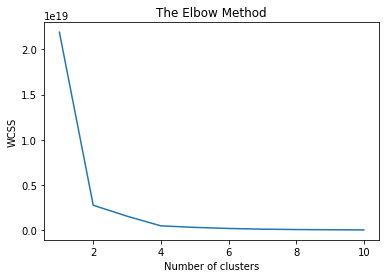

In [14]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

In [16]:
df['risk_factor']=y_kmeans

In [17]:
df1=df[df['risk_factor']==0]
df2=df[df['risk_factor']==1]

In [18]:
df1

,timeStamp,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID,risk_factor
117459,1514762901,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2,0
117460,1514762902,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2,0
117461,1514762903,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2,0
117462,1514762904,0,2.4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2,0
117463,1514762905,0,2.7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214690,1514740524,1081,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,53,0
7214691,1514740525,1081,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,53,0
7214692,1514740526,1081,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,53,0
7214693,1514740527,1081,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,53,0


In [19]:
df2

,timeStamp,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID,risk_factor
1374023,1507298199,0,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12,1
1374024,1507298200,0,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12,1
1374025,1507298201,0,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12,1
1374026,1507298202,0,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12,1
1374027,1507298203,0,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765108,1509892126,388,1.7285,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,53,1
6765109,1509892127,388,2.1885,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,53,1
6765110,1509892128,388,1.2285,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,53,1
6765111,1509892129,388,1.4785,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,53,1


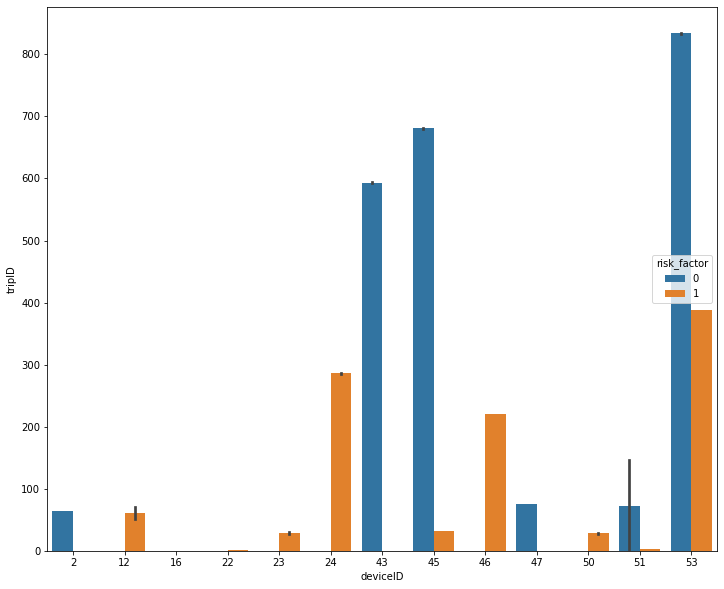

In [20]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="tripID", hue="risk_factor")
plt.show()

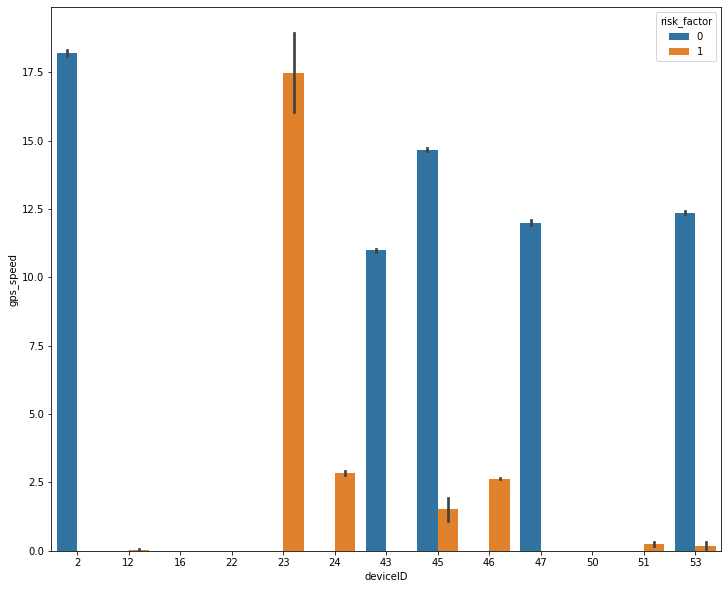

In [21]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="gps_speed", hue="risk_factor")
plt.show()

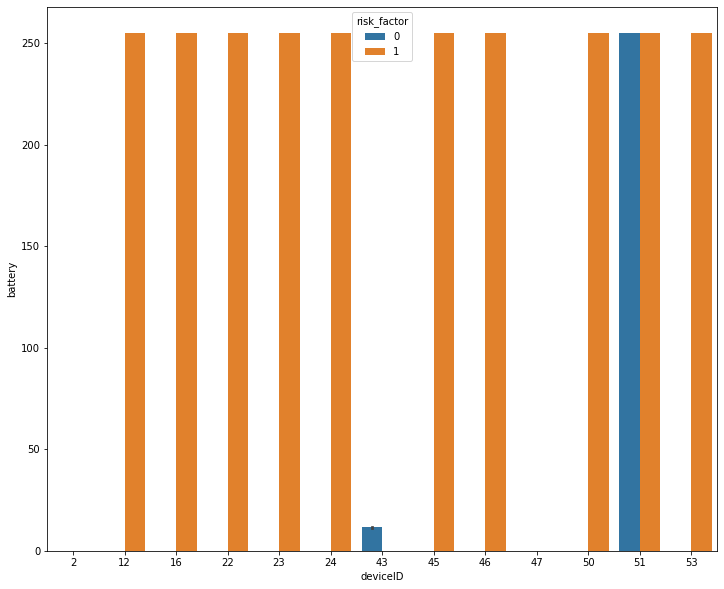

In [22]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="battery", hue="risk_factor")
plt.show()

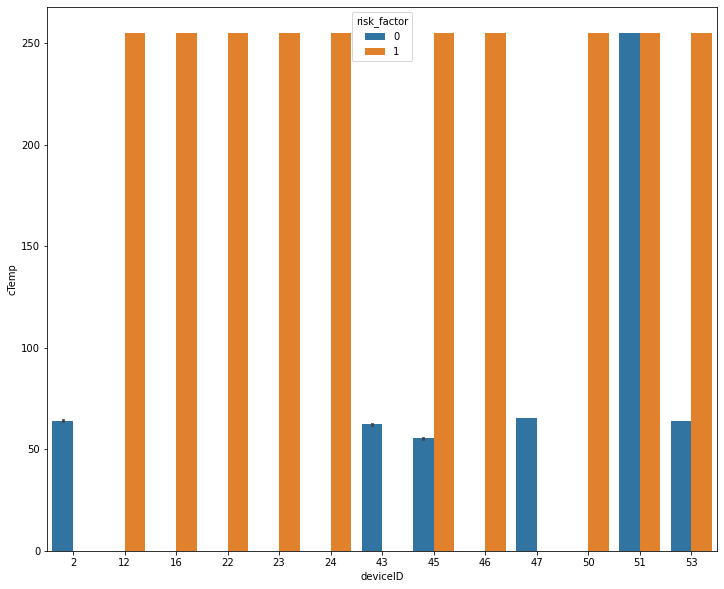

In [23]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="cTemp", hue="risk_factor")
plt.show()

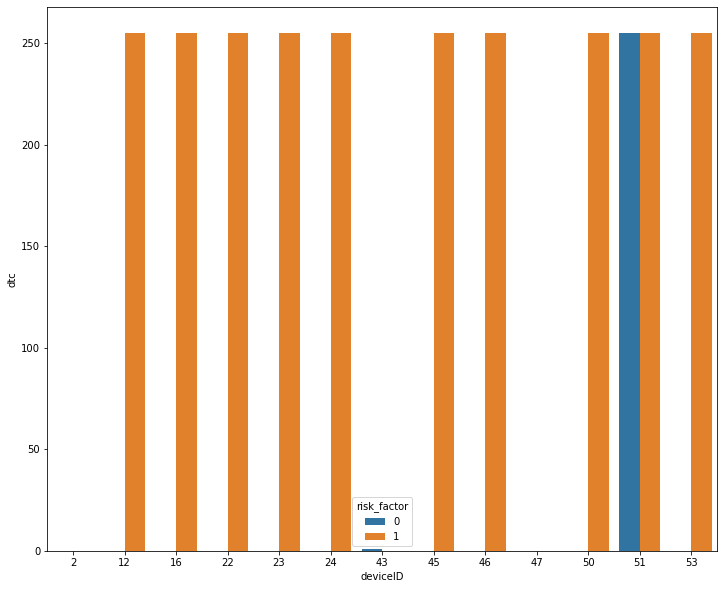

In [24]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="dtc", hue="risk_factor")
plt.show()

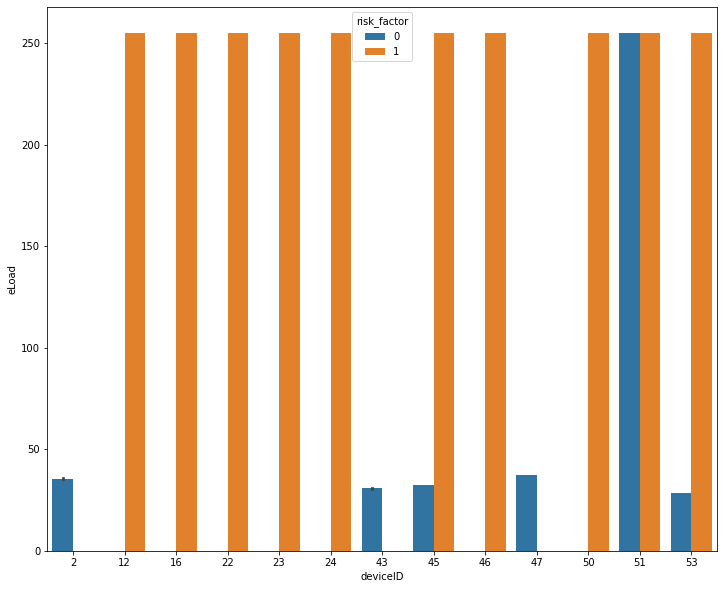

In [25]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="eLoad", hue="risk_factor")
plt.show()

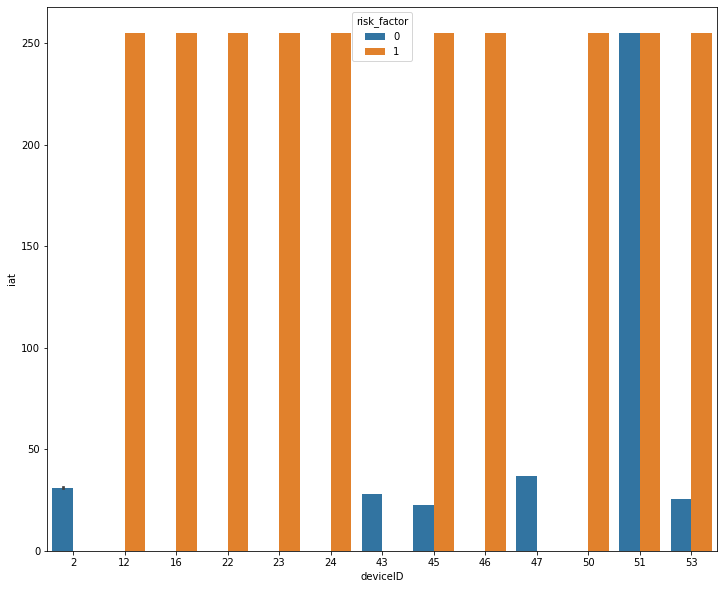

In [26]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="iat", hue="risk_factor")
plt.show()

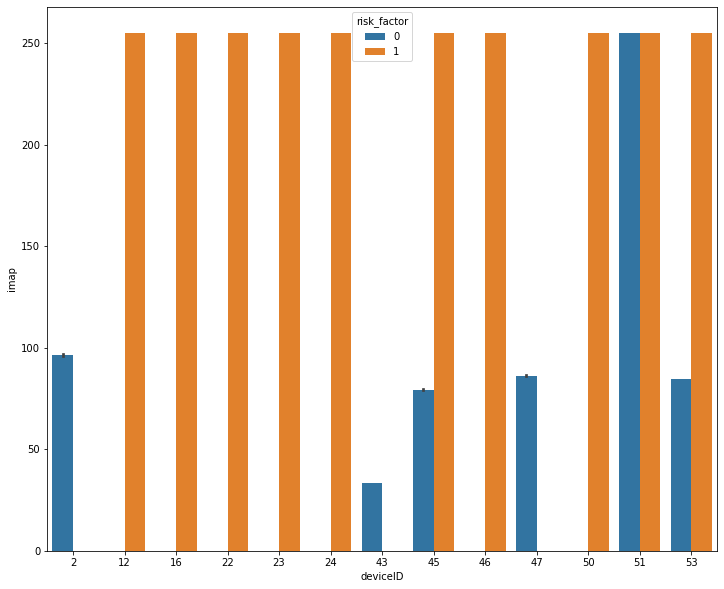

In [27]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="imap", hue="risk_factor")
plt.show()

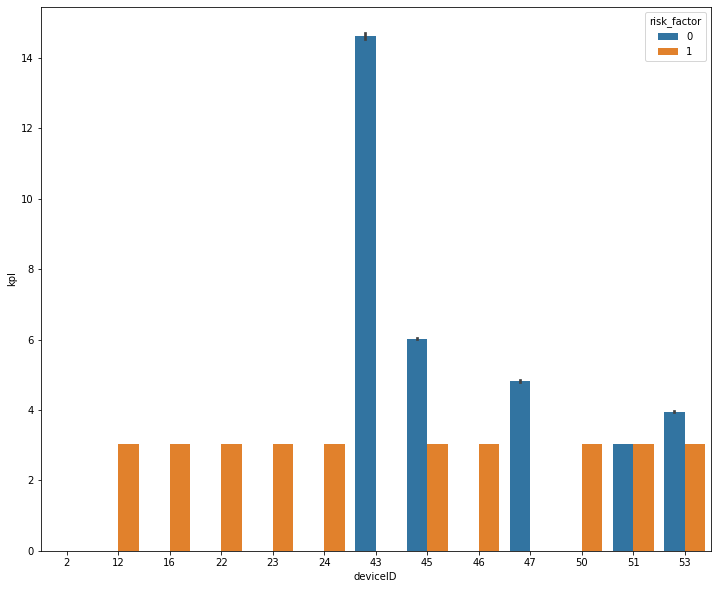

In [28]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="kpl", hue="risk_factor")
plt.show()

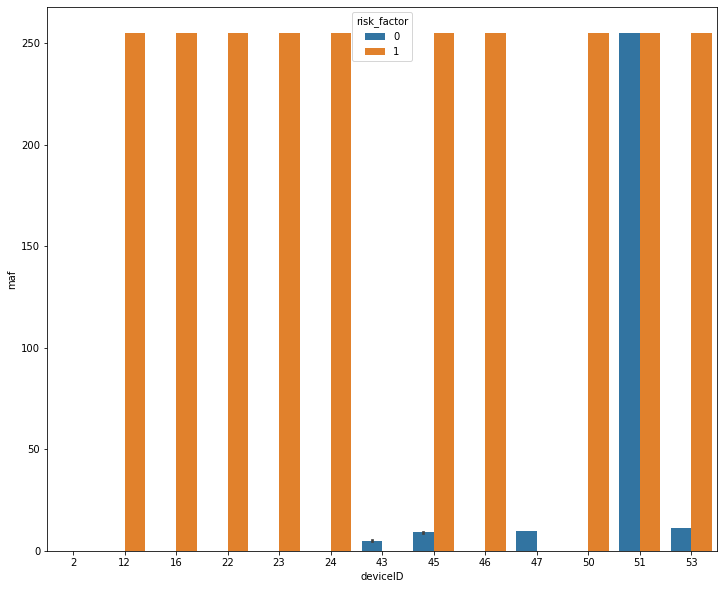

In [29]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="maf", hue="risk_factor")
plt.show()

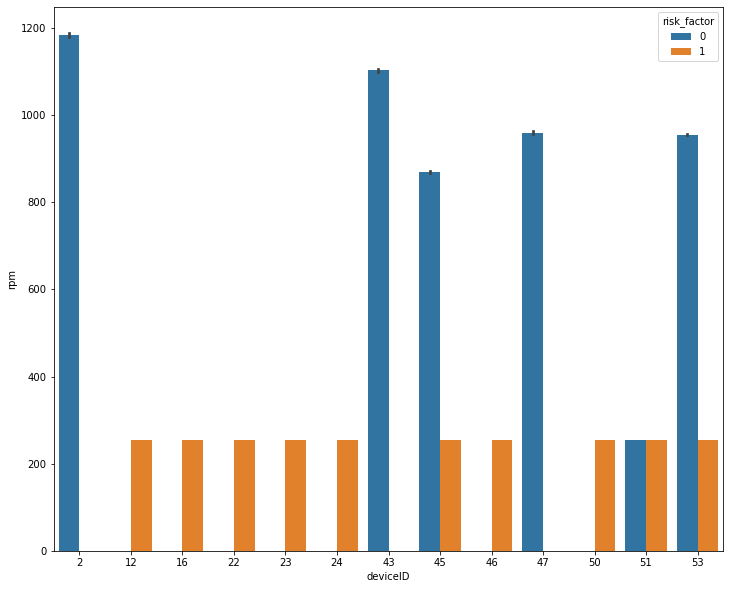

In [30]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="rpm", hue="risk_factor")
plt.show()

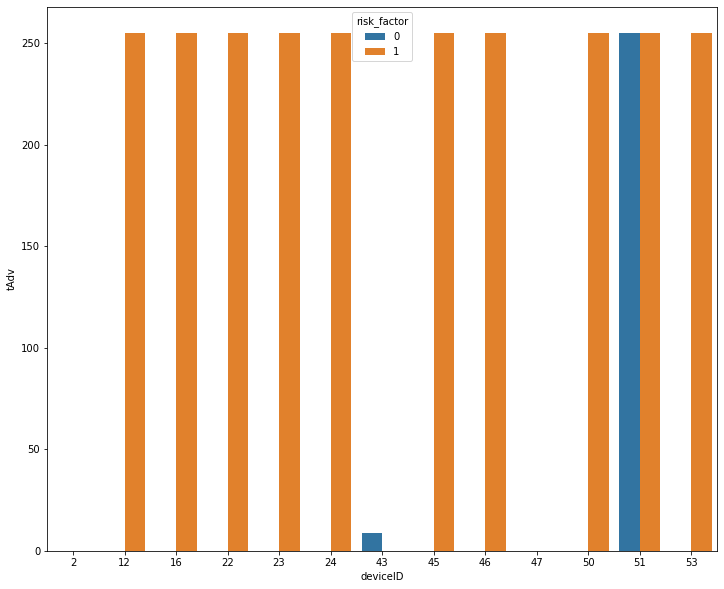

In [31]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="tAdv", hue="risk_factor")
plt.show()

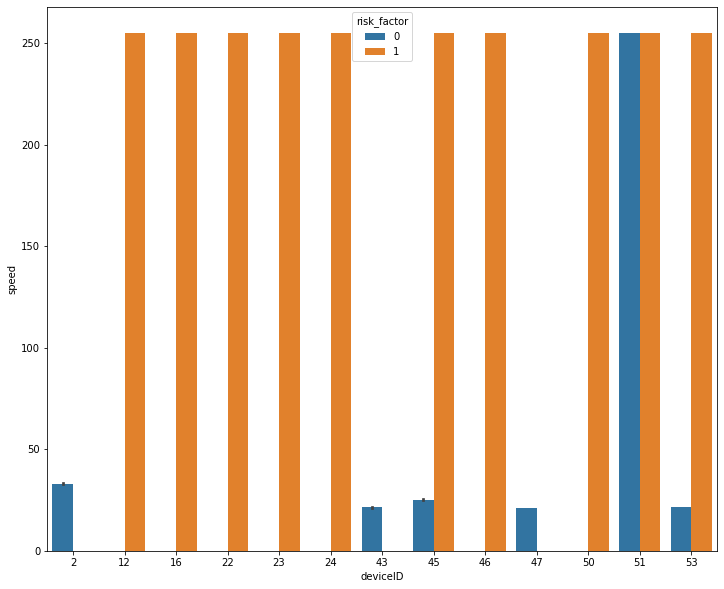

In [32]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="speed", hue="risk_factor")
plt.show()

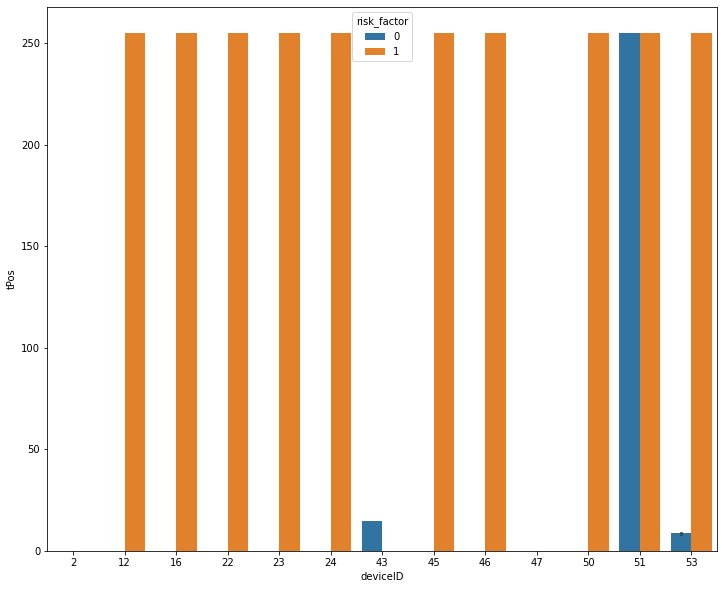

In [33]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="deviceID", y="tPos", hue="risk_factor")
plt.show()

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [35]:
features=df.drop(['risk_factor'],axis=1)
target=df[['risk_factor']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.33,random_state=0)

In [37]:
pipelines = {
    'svc':make_pipeline(StandardScaler(), SVC()),
    'rfc':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'dt':make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [38]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

svc 1.0
rfc 1.0
dt 1.0
gb 1.0
